In [39]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import t, ttest_ind, levene

In [40]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [41]:
all_data = pd.read_csv("rmpCapstoneAdjusted_69989.csv")
# display(all_data.columns, len(all_data))

In [42]:
all_data.head()

,Average Rating,Average Rating (Adjusted),Average Difficulty,Average Difficulty (Adjusted),Number of ratings,Received a “pepper”?,The proportion of students that said they would take the class again,The number of ratings coming from online classes,Male gender,Female,Major/Field,University,US State,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don’t skip class or you will not pass,Lots of homework,Inspirational,Pop quizzes!,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy,Tough grader (Normalized),Good feedback (Normalized),Respected (Normalized),Lots to read (Normalized),Participation matters (Normalized),Don’t skip class or you will not pass (Normalized),Lots of homework (Normalized),Inspirational (Normalized),Pop quizzes! (Normalized),Accessible (Normalized),So many papers (Normalized),Clear grading (Normalized),Hilarious (Normalized),Test heavy (Normalized),Graded by few things (Normalized),Amazing lectures (Normalized),Caring (Normalized),Extra credit (Normalized),Group projects (Normalized),Lecture heavy (Normalized),Total Number of Tags,Average Tags per Rating
0,5.0,4.284895,1.5,2.318731,2.0,0.0,NaN,0.0,0,1,Criminal Justice,George Mason University,VA,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.500000,2,1.000000
1,3.2,3.460639,3.0,2.941951,4.0,0.0,NaN,0.0,1,0,English,Alabama State University,AL,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500000,0.250000,0.500000,0.250000,0.000000,1.000000,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,12,3.000000
2,3.6,3.648037,3.5,3.353358,10.0,1.0,NaN,0.0,0,0,English,University of Kentucky,KY,6,3,0,0,2,4,2,1,0,0,0,2,1,0,0,0,0,0,1,0,0.600000,0.300000,0.000000,0.000000,0.200000,0.400000,0.200000,0.100000,0.0,0.000000,0.0,0.200000,0.100000,0.0,0.0,0.0,0.000000,0.0,0.100000,0.000000,22,2.200000
3,1.0,3.106119,5.0,3.398414,1.0,0.0,NaN,0.0,0,0,English,Keiser University,FL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0,0.000000
4,3.5,3.536979,3.3,3.247746,22.0,0.0,56.0,7.0,1,0,English,Eastern Florida State College,FL,8,13,1,3,2,3,2,1,0,3,0,7,3,0,0,0,3,0,1,3,0.363636,0.590909,0.045455,0.136364,0.090909,0.136364,0.090909,0.045455,0.0,0.136364,0.0,0.318182,0.136364,0.0,0.0,0.0,0.136364,0.0,0.045455,0.136364,53,2.409091


In [43]:
len(all_data.query("`Male gender` == 1 | `Female` == 1"))

54288

## Question 1

### For Question 1, we firstly apply Levene's test to check whether the two datasets have equal variances, and then use the proper t-test to test whether the ratings are gendered.

In [44]:
# We are choosing Tim Zhou's N number to be the seed.
rng = np.random.default_rng(14420733)

ALPHA = 0.005
# extract average difficulty for male and female professors
rating_male = all_data.query("`Male gender` == 1 & `Female` == 0")["Average Rating (Adjusted)"]
rating_female = all_data.query("`Male gender` == 0 & `Female` == 1")["Average Rating (Adjusted)"]

# We must reindex here. It is crucial for bootstrapping in Question 3
rating_male = rating_male.reset_index(drop=True)
rating_female = rating_female.reset_index(drop=True)

# calculate and print sample sizes
n_male, n_female = len(rating_male), len(rating_female)
print(f"Number of male professors: {n_male}")
print(f"Number of female professors: {n_female}")

# calculate and print variances
var_male, var_female  = rating_male.var(ddof=1), rating_female.var(ddof=1)
print(f"Variance in Average Difficulty (Adjusted) of male professors: {var_male:.4f}")
print(f"Variance in Average Difficulty (Adjusted) of female professors: {var_female:.4f}")

# perform Levene's test to check for equal variances, and then decide the proper test.
# BE CAREFUL that we are testing a pro-male effect, so it should be ONE-SIDED test.
levene_test = levene(rating_male, rating_female)
print(f"Levene's Test:\n  Statistic = {levene_test.statistic:.4f}\n  P-Value = {levene_test.pvalue:.4e}")
if levene_test.pvalue > ALPHA:
    print("We can assume equal vairance --> We shall use independent samples t-test\n")
    inde_t_test = ttest_ind(rating_male, rating_female, equal_var=True, alternative="greater")
    stats, pval = inde_t_test.statistic, inde_t_test.pvalue
    print(f"Independent Samples t-test:\n  Statistic = {stats:.4f}\n  P-Value = {pval:.4e}")
else:
    print("We cannot assume equal vairance --> We shall use Welch t-test\n")
    welch_t_test = ttest_ind(rating_male, rating_female, equal_var=False, alternative="greater")
    stats, pval = welch_t_test.statistic, welch_t_test.pvalue
    print(f"Welch t-Test:\n  Statistic = {welch_t_test.statistic:.4f}\n  P-Value = {welch_t_test.pvalue:.4e}")

whether_significant = 'significant!' if pval < ALPHA else 'not significant!'
print(f"The p-value for the one-sided t-test is {pval:.4e}, which means that the result is {whether_significant}")



Number of male professors: 27158
Number of female professors: 24917
Variance in Average Difficulty (Adjusted) of male professors: 0.2922
Variance in Average Difficulty (Adjusted) of female professors: 0.3069
Levene's Test:
  Statistic = 23.6088
  P-Value = 1.1839e-06
We cannot assume equal vairance --> We shall use Welch t-test

Welch t-Test:
  Statistic = 7.2210
  P-Value = 2.6165e-13
The p-value for the one-sided t-test is 2.6165e-13, which means that the result is significant!


3.8521604914066385 3.8174722880501877


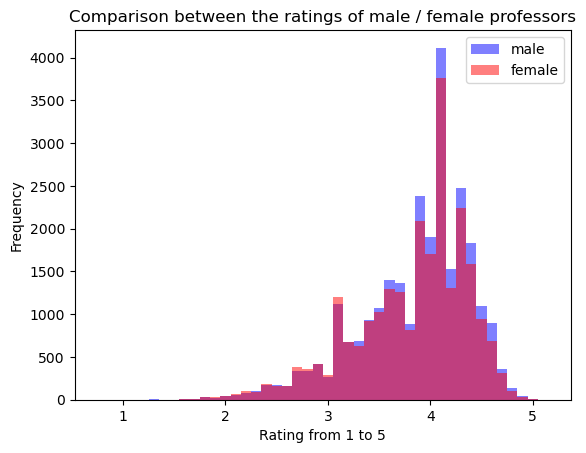

In [45]:
print(rating_male.mean(), rating_female.mean())
bins = np.arange(0.75, 5.25, 0.1)
plt.hist(rating_male, bins=bins, label='male', alpha=0.5, color="blue")
plt.hist(rating_female, bins=bins, label='female', alpha=0.5, color="red")
plt.xlabel('Rating from 1 to 5')
plt.ylabel('Frequency')
plt.title('Comparison between the ratings of male / female professors')
plt.legend()
plt.show()

## Question 2

### For Quesion 2, we use Levene's test to check whether there is a gender difference in spread

In [46]:
# calculate and print variances
var_male, var_female  = rating_male.var(ddof=1), rating_female.var(ddof=1)
print(f"Variance in Average Difficulty (Adjusted) of male professors: {var_male:.4f}")
print(f"Variance in Average Difficulty (Adjusted) of female professors: {var_female:.4f}")

# perform Levene's test to check for equal variances, and then decide the proper test.
levene_test = levene(rating_male, rating_female)
print(f"Levene's Test:\n  Statistic = {levene_test.statistic:.4f}\n  P-Value = {levene_test.pvalue:.4e}")
if levene_test.pvalue > ALPHA:
    print("There is not a gender difference in the spread \n")
else:
    print("There is a gender difference in the spread \n")

Variance in Average Difficulty (Adjusted) of male professors: 0.2922
Variance in Average Difficulty (Adjusted) of female professors: 0.3069
Levene's Test:
  Statistic = 23.6088
  P-Value = 1.1839e-06
There is a gender difference in the spread 



## Question 3

### For Question 3, we use boostrap to determine the confidence interval of the effect size of mean and variance

In [47]:
rng = np.random.default_rng(14420733)
num_samples = 10000
n_exper = 5000
boot_male_mean, boot_female_mean, boot_male_var, boot_female_var = [], [], [], []
boot_cohen_d, boot_var_ratio = [], []

for i in range(n_exper):
    # Generate my bootstrap samples
    boot_male_ind = rng.integers(low=0, high=len(rating_male), size=num_samples)
    boot_female_ind = rng.integers(low=0, high=len(rating_female), size=num_samples)

    boot_male_samp, boot_female_samp = rating_male[boot_male_ind], rating_female[boot_female_ind]

    # Calculate and append bootstrapped means and variances
    each_mean_male, each_mean_female = boot_male_samp.mean(), boot_female_samp.mean()
    each_var_male, each_var_female = boot_male_samp.var(ddof=1), boot_female_samp.var(ddof=1)

    boot_male_mean.append(each_mean_male)
    boot_male_var.append(each_var_male)
    boot_female_mean.append(each_mean_female)
    boot_female_var.append(each_var_female)

    # Calculate Cohen's d and variance ratio
    # I am doing this inside the loop because the values are stored in lists rather than ndarray
    each_mean_diff = each_mean_male - each_mean_female
    boot_cohen_d.append(each_mean_diff / np.sqrt((each_var_male + each_var_female) / 2) )
    boot_var_ratio.append(each_var_male / each_var_female)

# Calculate 95% confidence intervals for Cohen's d and variance ratio
ci_cohen_d = np.percentile(boot_cohen_d, [2.5, 97.5])
ci_var_ratio = np.percentile(boot_var_ratio, [2.5, 97.5])

print(f"Bootstrapped Cohen's d: {np.mean(boot_cohen_d):.4f}")
print(f"95% CI for Cohen's d: {ci_cohen_d}")
print(f"Bootstrapped Variance Ratio: {np.mean(ci_var_ratio):.4f}")
print(f"95% CI for Variance Ratio: {ci_var_ratio}")


Bootstrapped Cohen's d: 0.0633
95% CI for Cohen's d: [0.03573299 0.09076494]
Bootstrapped Variance Ratio: 0.9519
95% CI for Variance Ratio: [0.91048425 0.99339719]


## Question 4

### For Question 4, we use t test to determine whether each tag is gendered.

In [48]:
# First extrace columns that are tages
normalized_tag_columns = [
    'Tough grader (Normalized)', 'Good feedback (Normalized)', 'Respected (Normalized)',
    'Lots to read (Normalized)', 'Participation matters (Normalized)', 
    "Don’t skip class or you will not pass (Normalized)", 'Lots of homework (Normalized)',
    'Inspirational (Normalized)', 'Pop quizzes! (Normalized)', 'Accessible (Normalized)', 
    'So many papers (Normalized)', 'Clear grading (Normalized)', 'Hilarious (Normalized)',
    'Test heavy (Normalized)', 'Graded by few things (Normalized)', 'Amazing lectures (Normalized)',
    'Caring (Normalized)', 'Extra credit (Normalized)', 'Group projects (Normalized)',
    'Lecture heavy (Normalized)'
]

# This result list will be used to generate a dataframe to match tag and p-values
tag_results = []

for tag in normalized_tag_columns:
    # Split normalized tag values by gender
    tag_male = all_data.query("`Male gender` == 1 & `Female` == 0")[tag]
    tag_female = all_data.query("`Male gender` == 0 & `Female` == 1")[tag]
    
    # Perform Levene first, and then t-test
    levene_test = levene(tag_male, tag_female)
    if_eq_var = False if levene_test.pvalue > ALPHA else True
    each_result = ttest_ind(tag_male, tag_female, equal_var=if_eq_var)
    
    tag_results.append({'Tag': tag, 'P-Value': each_result.pvalue})

# Convert results to DataFrame, such that tags are paired with p-values, then sort
results_df = pd.DataFrame(tag_results)
results_df = results_df.sort_values('P-Value')

# extract significantly gendered tags
gendered_tags = results_df[results_df["P-Value"] <= ALPHA]["Tag"].to_list()
gendered_tags = [each_tag.replace(" (Normalized)", "") for each_tag in gendered_tags]
print(f"The following {len(gendered_tags)} tags exhibit a statistically significant different in gender: {gendered_tags}")

most_sig_3, least_sig_3 = results_df["Tag"].to_list()[:3], results_df["Tag"].to_list()[-3:]
most_sig_3 = [each_tag.replace(" (Normalized)", "") for each_tag in most_sig_3]
least_sig_3 = [each_tag.replace(" (Normalized)", "") for each_tag in least_sig_3]
print(f"The most gendered 3 tags are {most_sig_3}, and the least gendered 3 tags are {least_sig_3}")

The following 19 tags exhibit a statistically significant different in gender: ['Hilarious', 'Amazing lectures', 'Caring', 'Respected', 'Lecture heavy', 'Participation matters', 'Good feedback', 'Graded by few things', 'Lots of homework', 'Group projects', 'So many papers', 'Extra credit', 'Tough grader', 'Test heavy', 'Clear grading', 'Accessible', 'Inspirational', 'Lots to read', 'Don’t skip class or you will not pass']
The most gendered 3 tags are ['Hilarious', 'Amazing lectures', 'Caring'], and the least gendered 3 tags are ['Lots to read', 'Don’t skip class or you will not pass', 'Pop quizzes!']


In [49]:
results_df

,Tag,P-Value
12,Hilarious (Normalized),8.550862e-216
15,Amazing lectures (Normalized),4.864451e-60
16,Caring (Normalized),6.465842e-47
2,Respected (Normalized),8.432448e-41
19,Lecture heavy (Normalized),2.181706e-35
4,Participation matters (Normalized),4.293868e-30
1,Good feedback (Normalized),3.610323e-27
14,Graded by few things (Normalized),1.937170e-24
6,Lots of homework (Normalized),1.379052e-18
18,Group projects (Normalized),9.623713e-18


In [ ]:
# First extrace columns that are tages
normalized_tag_columns = [
    'Tough grader (Normalized)', 'Good feedback (Normalized)', 'Respected (Normalized)',
    'Lots to read (Normalized)', 'Participation matters (Normalized)', 
    "Don’t skip class or you will not pass (Normalized)", 'Lots of homework (Normalized)',
    'Inspirational (Normalized)', 'Pop quizzes! (Normalized)', 'Accessible (Normalized)', 
    'So many papers (Normalized)', 'Clear grading (Normalized)', 'Hilarious (Normalized)',
    'Test heavy (Normalized)', 'Graded by few things (Normalized)', 'Amazing lectures (Normalized)',
    'Caring (Normalized)', 'Extra credit (Normalized)', 'Group projects (Normalized)',
    'Lecture heavy (Normalized)'
]

# This result list will be used to generate a dataframe to match tag and p-values
tag_results = []

for tag in normalized_tag_columns:
    # Split normalized tag values by gender
    non_zero = all_data[all_data[tag] != 0.0]
    tag_male = non_zero.query(f"`Male gender` == 1 & `Female` == 0")[tag]
    tag_female = non_zero.query(f"`Male gender` == 0 & `Female` == 1")[tag]
    
    each_result = ttest_ind(tag_male, tag_female, equal_var=False)
    
    tag_results.append({'Tag': tag, 'P-Value': each_result.pvalue})

# Convert results to DataFrame, such that tags are paired with p-values, then sort
results_df = pd.DataFrame(tag_results)
results_df = results_df.sort_values('P-Value')

# extract significantly gendered tags
gendered_tags = results_df[results_df["P-Value"] <= ALPHA]["Tag"].to_list()
gendered_tags = [each_tag.replace(" (Normalized)", "") for each_tag in gendered_tags]
print(f"The following {len(gendered_tags)} tags exhibit a statistically significant different in gender: {gendered_tags}")

most_sig_3, least_sig_3 = results_df["Tag"].to_list()[:3], results_df["Tag"].to_list()[-3:]
most_sig_3 = [each_tag.replace(" (Normalized)", "") for each_tag in most_sig_3]
least_sig_3 = [each_tag.replace(" (Normalized)", "") for each_tag in least_sig_3]
print(f"The most gendered 3 tags are {most_sig_3}, and the least gendered 3 tags are {least_sig_3}")
display(results_df)
print(tag_results)

The following 3 tags exhibit a statistically significant different in gender: ['Hilarious', 'Amazing lectures', 'Respected']
The most gendered 3 tags are ['Hilarious', 'Amazing lectures', 'Respected'], and the least gendered 3 tags are ['Tough grader', 'Good feedback', 'Caring']


,Tag,P-Value
12,Hilarious (Normalized),4.851583e-17
15,Amazing lectures (Normalized),1.367458e-06
2,Respected (Normalized),5.638822e-06
19,Lecture heavy (Normalized),4.769392e-02
14,Graded by few things (Normalized),1.638115e-01
8,Pop quizzes! (Normalized),4.945150e-01
9,Accessible (Normalized),5.844189e-01
13,Test heavy (Normalized),9.009672e-01
7,Inspirational (Normalized),9.351576e-01
10,So many papers (Normalized),9.887987e-01


[{'Tag': 'Tough grader (Normalized)', 'P-Value': 0.9999999999999731}, {'Tag': 'Good feedback (Normalized)', 'P-Value': 1.0}, {'Tag': 'Respected (Normalized)', 'P-Value': 5.638821855503776e-06}, {'Tag': 'Lots to read (Normalized)', 'P-Value': 0.9969204263616843}, {'Tag': 'Participation matters (Normalized)', 'P-Value': 0.999999999915709}, {'Tag': 'Don’t skip class or you will not pass (Normalized)', 'P-Value': 0.9999992502783343}, {'Tag': 'Lots of homework (Normalized)', 'P-Value': 0.9999999993272158}, {'Tag': 'Inspirational (Normalized)', 'P-Value': 0.935157595067326}, {'Tag': 'Pop quizzes! (Normalized)', 'P-Value': 0.49451495827985514}, {'Tag': 'Accessible (Normalized)', 'P-Value': 0.5844188857769246}, {'Tag': 'So many papers (Normalized)', 'P-Value': 0.9887986761812698}, {'Tag': 'Clear grading (Normalized)', 'P-Value': 0.999999999999537}, {'Tag': 'Hilarious (Normalized)', 'P-Value': 4.8515825857151685e-17}, {'Tag': 'Test heavy (Normalized)', 'P-Value': 0.9009672241215945}, {'Tag': 'G

In [ ]:
# [tag_male['Tough grader (Normalized)'] != 0.0]
non_zero = all_data[all_data['Tough grader (Normalized)'] != 0.0]
tag_male = non_zero.query(f"`Male gender` == 1 & `Female` == 0")['Tough grader (Normalized)']
tag_female = non_zero.query(f"`Male gender` == 0 & `Female` == 1")['Tough grader (Normalized)']
tag_male


1        0.500000
4        0.363636
15       0.400000
37       0.333333
54       0.285714
55       0.500000
57       0.571429
62       0.300000
75       0.500000
86       0.400000
95       0.482759
98       0.240000
101      0.500000
113      0.250000
115      0.400000
123      0.166667
124      0.500000
142      0.250000
145      0.062500
150      0.666667
169      0.285714
192      0.428571
201      0.142857
203      0.250000
204      0.333333
213      0.200000
221      0.350000
225      0.200000
245      0.250000
250      0.076923
255      0.500000
265      0.333333
282      0.400000
289      0.375000
292      0.600000
293      0.333333
298      0.083333
313      0.071429
316      0.466667
332      0.250000
339      0.166667
348      0.333333
352      0.500000
368      0.142857
374      0.400000
381      0.500000
404      0.500000
409      0.400000
415      0.166667
420      0.800000
423      0.666667
435      0.250000
453      0.181818
459      1.000000
465      0.153846
466      0